# Modéle linéaire: statsmodels, sklearn et sympy

***
> __Auteur__: Joseph Salmon
> <joseph.salmon@umontpellier.fr>

# Statsmodels et moindre carrés
ATTENTION: pour utiliser la syntaxe de type "R" en statsmodel, il faut patsy version > '0.5.1'
ce que l'on peut tester avec 

In [1]:
import patsy
patsy.__version__

'0.5.1'

In [2]:
# Utiliser 'pip install download' (en ligne de commande) si besoin sur votre machine
from download import download

import numpy as np
from sklearn import linear_model
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
%matplotlib notebook

In [4]:
url = "http://josephsalmon.eu/enseignement/datasets/arbres.txt"
path_target = "./arbres.txt"
download(url, path_target, replace=False)

Replace is False and data exists, so doing nothing. Use replace==True to re-download the data.


'./arbres.txt'

In [24]:
df_arbres = pd.read_csv("arbres.txt",sep=' ')

Aide disponible ici pour le package statsmodels (avec la syntaxe de R):
http://www.statsmodels.org/devel/example_formulas.html

In [25]:
results = smf.ols('vol ~ aire', data=df_arbres).fit()
results.summary()

/home/jo/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    vol   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     257.2
Date:                Thu, 18 Apr 2019   Prob (F-statistic):           2.29e-07
Time:                        10:31:47   Log-Likelihood:                 27.418
No. Observations:                  10   AIC:                            -50.84
Df Residuals:                       8   BIC:                            -50.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0052      0.017      0.305      0.768      -0.034       0.045
aire           0.0005   3.06e-05     16.039      0.000       0.000       0.001
==============================================================================
Omnibus:                        0.402   Durbin-Watson:                   2.424
Prob(Omnibus):                  0.818   Jarque-Bera (JB):                0.331
Skew:                          -0.343   Prob(JB):                        0.847
Kurtosis:                       2.431   Cond. No.                     1.75e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
results.params

Intercept    0.005233
aire         0.000491
dtype: float64

In [31]:
xlim = [0, 900]
ylim = [0, 0.5]
X_pred = np.linspace(0,900,num=50)
X_pred

array([  0.        ,  18.36734694,  36.73469388,  55.10204082,
        73.46938776,  91.83673469, 110.20408163, 128.57142857,
       146.93877551, 165.30612245, 183.67346939, 202.04081633,
       220.40816327, 238.7755102 , 257.14285714, 275.51020408,
       293.87755102, 312.24489796, 330.6122449 , 348.97959184,
       367.34693878, 385.71428571, 404.08163265, 422.44897959,
       440.81632653, 459.18367347, 477.55102041, 495.91836735,
       514.28571429, 532.65306122, 551.02040816, 569.3877551 ,
       587.75510204, 606.12244898, 624.48979592, 642.85714286,
       661.2244898 , 679.59183673, 697.95918367, 716.32653061,
       734.69387755, 753.06122449, 771.42857143, 789.79591837,
       808.16326531, 826.53061224, 844.89795918, 863.26530612,
       881.63265306, 900.        ])

## Prétraitement pour utiliser `statsmodels`

In [34]:
# Utile pour l'affichage: on trie dans l'ordre croissant les observations (tester l'affichage sans!)
df_arbres.sort_values(by=['aire'], inplace=True)
# Obligatoire pour gerer la constante:
X = sm.add_constant(df_arbres['aire'])
X_pred_sm = sm.add_constant(X_pred)
# Besoin de créer un dataframe pour garder la structure
df_to_predic = pd.DataFrame(X_pred_sm)
df_to_predic.columns = ['Intercept', 'aire']

In [36]:
X_pred_sm

array([[  1.        ,   0.        ],
       [  1.        ,  18.36734694],
       [  1.        ,  36.73469388],
       [  1.        ,  55.10204082],
       [  1.        ,  73.46938776],
       [  1.        ,  91.83673469],
       [  1.        , 110.20408163],
       [  1.        , 128.57142857],
       [  1.        , 146.93877551],
       [  1.        , 165.30612245],
       [  1.        , 183.67346939],
       [  1.        , 202.04081633],
       [  1.        , 220.40816327],
       [  1.        , 238.7755102 ],
       [  1.        , 257.14285714],
       [  1.        , 275.51020408],
       [  1.        , 293.87755102],
       [  1.        , 312.24489796],
       [  1.        , 330.6122449 ],
       [  1.        , 348.97959184],
       [  1.        , 367.34693878],
       [  1.        , 385.71428571],
       [  1.        , 404.08163265],
       [  1.        , 422.44897959],
       [  1.        , 440.81632653],
       [  1.        , 459.18367347],
       [  1.        , 477.55102041],
 

<IPython.core.display.Javascript object>


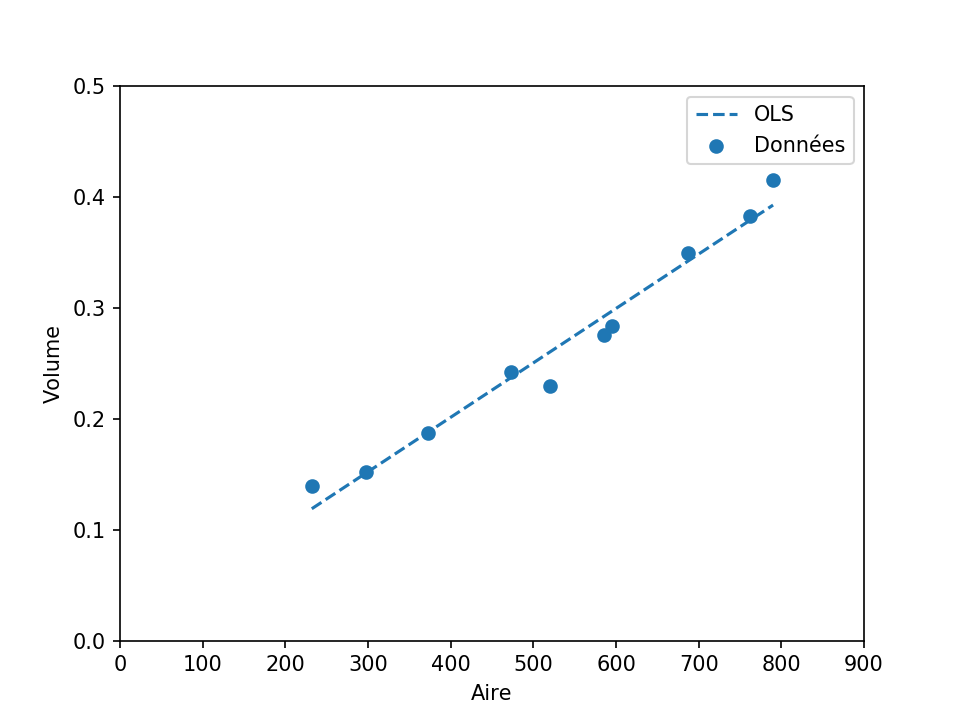

In [35]:
plt.figure()
plt.scatter(df_arbres['aire'], df_arbres['vol'], label='Données')
plt.xlabel('Aire')
plt.ylabel('Volume')
plt.plot(df_arbres['aire'], results.predict(df_arbres['aire']), '--', label='OLS')
plt.xlim(xlim)
plt.ylim(ylim)

plt.legend()

# `sklearn`: exemple de la syntaxe des moindre carrés

In [40]:
# Prétraitement sklearn:
X_pred_skl = X_pred.reshape(-1, 1)
X_pred_skl.shape

(50, 1)

In [42]:
skl_linmod = linear_model.LinearRegression(fit_intercept=True)
# ATTENTION: sklearn a besoin d'une matrice de taille n x p (p ne peut pas être 0)
skl_linmod.fit(df_arbres[['aire']], df_arbres['vol'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<IPython.core.display.Javascript object>


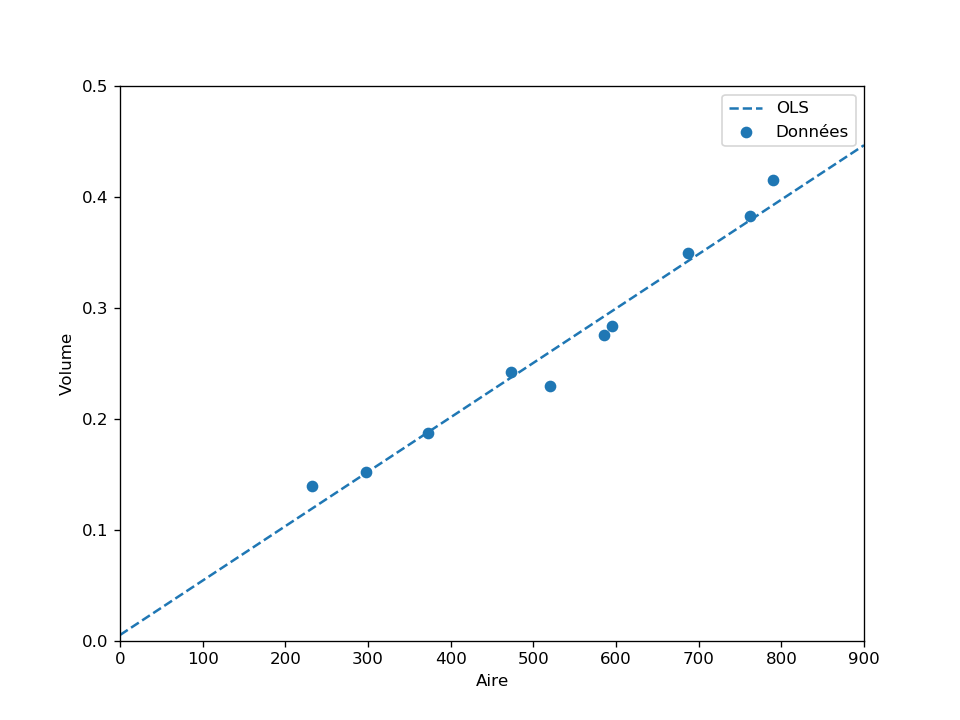

In [43]:
plt.figure(figsize=(8, 6))
plt.scatter(df_arbres['aire'], df_arbres['vol'], label='Données')
plt.xlabel('Aire')
plt.ylabel('Volume')
plt.xlim([0, 900])
plt.ylim([0, 0.5])
plt.plot(X_pred_skl, skl_linmod.predict(X_pred_skl), '--', label='OLS')
plt.legend()

# Anova et calcul symbolique: forme de la matrice $(X^\top X)^{-1}$

In [45]:
import sympy as sym

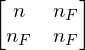

In [47]:
sym.init_printing()

nF, nM, n = sym.symbols('n_F n_M n')
matrix = sym.Matrix([[n, nF],
                     [nF, nF]])
matrix

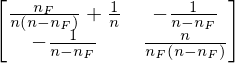

In [49]:
sol=matrix.inv()
sol

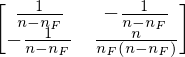

In [50]:
sol=sym.simplify(sol)
sol

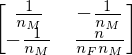

In [51]:
new_sol = sol.subs(n - nF, nM)
new_sol

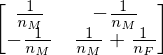

In [52]:
new_sol = sol.subs(n, nM + nF)
XTXinv = new_sol.expand()
XTXinv

# Cas muli-modalités de l'anova:

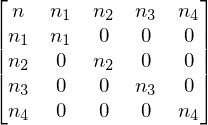

In [53]:
n0, n1, n2, n3, n4, n = sym.symbols('n0 n1 n2 n3 n4 n')
matrix4 = sym.Matrix([[n, n1, n2, n3, n4],
                      [n1, n1, 0, 0, 0],
                      [n2, 0, n2, 0, 0],
                      [n3, 0, 0, n3, 0],
                      [n4, 0, 0, 0, n4]]
                     )
matrix4

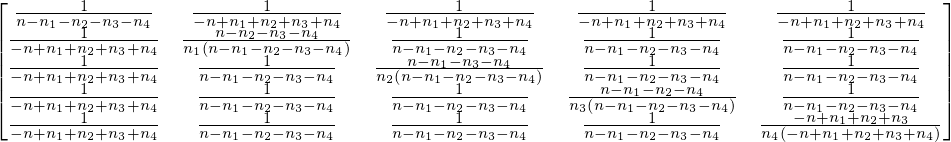

In [54]:
sol4 = sym.simplify(matrix4.inv())
sol4

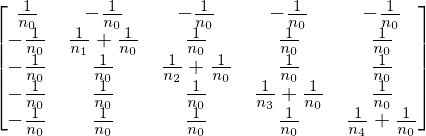

In [55]:
new_sol4 = sol4.subs(n, n0 + n1 + n2 + n3 + n4)
new_sol4.expand()